In [1]:
from forecast_accuracy_mcmc import *

In [2]:
'''Import locations'''
locations = pd.read_csv('./locations.csv',skiprows=0) 
locations = locations.drop([0]) #skip first row (national ID)
print("Number of Locations:", len(locations))

'''Map locations codes to state abbreviations.'''
for index, row in locations.iterrows():
    location_number = row['location']
    abbreviation = row['abbreviation']
    location_to_state.update({location_number: abbreviation})

'''Extract hospitalization data'''
global full_hosp_data
full_hosp_data = pd.read_csv('./COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv') 
full_hosp_data = full_hosp_data[['date','state','previous_day_admission_influenza_confirmed']].sort_values(['state','date'])
full_hosp_data['date'] = pd.to_datetime(full_hosp_data['date'])

def one_state_all_scores(state_code):
    """
    Generates all WIS scores for one state. 
    Uses the 'one_state_one_week' function to generate each week's score.
    Exports scores to a csv file.

    Args:
        state_code (int): The location code for the current state.
    """    
    state_code = str(state_code).zfill(2)
    
    state_df = pd.DataFrame(columns=[])

    forecast_path = './LosAlamos_NAU-CModel_Flu/'
    forecast_files = [file for file in listdir(forecast_path) if isfile(join(forecast_path, file))]
    forecast_files.sort()

    for file in forecast_files:
        all_forecast_data = pd.read_csv(forecast_path + file)
        all_forecast_data = all_forecast_data[all_forecast_data['output_type'] == 'quantile']

        weekly_scores = one_state_one_week_WIS(all_forecast_data, state_code)[0]
        state_df = pd.concat([state_df, pd.DataFrame([weekly_scores])], ignore_index=True)

one_state_one_week_WIS()

TypeError: one_state_one_week_WIS() missing 2 required positional arguments: 'forecast_df' and 'state_code_input'

In [ ]:
from matplotlib.pyplot import cm

colors = cm.plasma(np.linspace(0,1,12))

for i in range(11):
    plt.fill_between(range(4), np_quantiles[i,:], np_quantiles[22-i,:], facecolor = colors[11-i], zorder = i)

plt.scatter(range(4), np_forecast, zorder=30)
plt.title('4 weeks ahead WIS score' + str(np_wis))

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

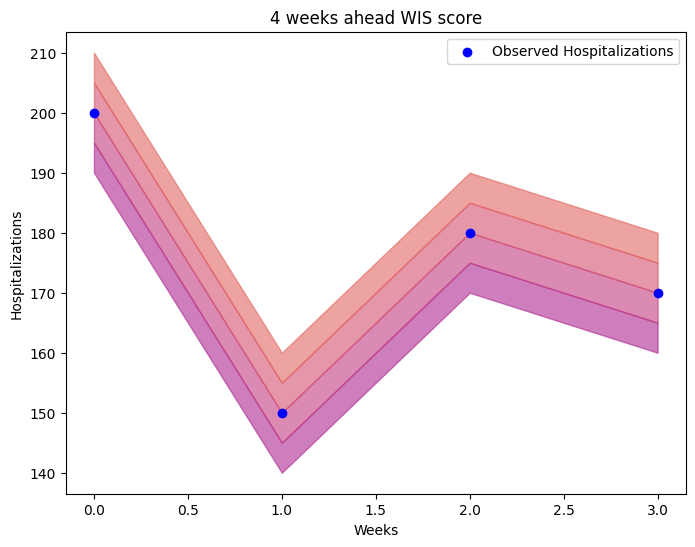

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_forecast_vs_observed(observed, quantiles, forecast):
    x = np.arange(len(observed))  # Generate x-axis values based on the length of observed data
    quantiles = np.array(quantiles)  # Convert quantiles to a numpy array
    forecast = np.array(forecast)  # Convert forecast data to a numpy array

    colors = cm.plasma(np.linspace(0,1,len(quantiles)//2))

    plt.figure(figsize=(8, 6))

    # Create a colormap for the quantiles
    cmap = plt.get_cmap('plasma')
    norm = plt.Normalize(np.min(forecast), np.max(forecast))

    # Plot each quantile range as a filled contour
    for i in range(forecast.shape[1] - 1):
        plt.fill_between(x, forecast[:, i], forecast[:, i + 1], color=cmap(norm(np.mean(forecast[:, i:i+2]))), alpha=0.6)

    # Plot the observed data points
    plt.scatter(x, observed, color='blue', label='Observed Hospitalizations')

    plt.title('4 weeks ahead WIS score')
    plt.xlabel('Weeks')
    plt.ylabel('Hospitalizations')
    plt.legend()

    # Create colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Only needed for matplotlib < 3.1
    plt.colorbar(sm, label='Quantiles')

    plt.show()

# Example usage with dummy data
observed_data = [180, 140, 200, 300]
quantiles = [[0.1, 0.25, 0.5, 0.75, 0.9] for _ in range(4)]
forecast_data = [
    [190, 195, 200, 205, 210],
    [140, 145, 150, 155, 160],
    [170, 175, 180, 185, 190],
    [160, 165, 170, 175, 180]
]

plot_forecast_vs_observed(observed_data, quantiles, forecast_data)
